In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import norm

In [2]:
nyc_p=pd.read_csv('https://github.com/sadriw/H8_PYTN_098/blob/main/nyc-rolling-sales.csv?raw=true')
nyc_p.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
nyc_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

SALE PRICE', 'LAND SQUARE FEET', dan 'GROSS SQUARE FEET' seharusnya memiliki tipe data numerik, tetapi data di atas memiliki tipe data 'object'.

In [4]:
# Ubah tipe data SALE PRICE ke float
nyc_p['SALE PRICE'] = pd.to_numeric(nyc_p['SALE PRICE'], errors='coerce')
nyc_p['SALE PRICE']

0         6625000.0
1               NaN
2               NaN
3         3936272.0
4         8000000.0
            ...    
84543      450000.0
84544      550000.0
84545      460000.0
84546    11693337.0
84547       69300.0
Name: SALE PRICE, Length: 84548, dtype: float64

In [5]:
# Ubah tipe data LAND SQUARE FEET ke float
nyc_p['LAND SQUARE FEET'] = pd.to_numeric(nyc_p['LAND SQUARE FEET'], errors='coerce')
nyc_p['LAND SQUARE FEET']

0          1633.0
1          4616.0
2          2212.0
3          2272.0
4          2369.0
           ...   
84543      2400.0
84544      2498.0
84545      4000.0
84546    208033.0
84547     10796.0
Name: LAND SQUARE FEET, Length: 84548, dtype: float64

In [6]:
# Ubah tipe data GROSS SQUARE FEET ke float
nyc_p['GROSS SQUARE FEET'] = pd.to_numeric(nyc_p['GROSS SQUARE FEET'], errors='coerce')
nyc_p['GROSS SQUARE FEET']

0         6440.0
1        18690.0
2         7803.0
3         6794.0
4         4615.0
          ...   
84543     2575.0
84544     2377.0
84545     1496.0
84546    64117.0
84547     2400.0
Name: GROSS SQUARE FEET, Length: 84548, dtype: float64

In [7]:
# Cek missing values
missing_values = nyc_p.isnull().sum()
print(missing_values)

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64


Terdapat missing value pada SALE PRICE', 'LAND SQUARE FEET', dan 'GROSS SQUARE FEET', dan dikarenakan data missing value minoritas dari sebaran data maka kita drop 

In [8]:
# Mengidentifikasi baris dengan missing values di kolom 'SALE PRICE', 'LAND SQUARE FEET', dan 'GROSS SQUARE FEET'
missing_values = nyc_p[['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']].isnull().any(axis=1)
missing_values

0        False
1         True
2         True
3        False
4        False
         ...  
84543    False
84544    False
84545    False
84546    False
84547    False
Length: 84548, dtype: bool

In [9]:
# Menghapus kolom yang tidak diperlukan
nyc_p = nyc_p.drop(['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'], axis=1)

In [10]:
# Menghapus baris dengan nilai null pada kolom
nyc_p = nyc_p.dropna(subset=['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET'])
nyc_p

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


In [11]:
# Mengganti tipe data kolom tanggal
nyc_p['SALE DATE'] = pd.to_datetime(nyc_p['SALE DATE'])

In [12]:
nyc_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48244 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         48244 non-null  int64         
 1   NEIGHBORHOOD                    48244 non-null  object        
 2   BUILDING CLASS CATEGORY         48244 non-null  object        
 3   TAX CLASS AT PRESENT            48244 non-null  object        
 4   BLOCK                           48244 non-null  int64         
 5   LOT                             48244 non-null  int64         
 6   BUILDING CLASS AT PRESENT       48244 non-null  object        
 7   ADDRESS                         48244 non-null  object        
 8   ZIP CODE                        48244 non-null  int64         
 9   RESIDENTIAL UNITS               48244 non-null  int64         
 10  COMMERCIAL UNITS                48244 non-null  int64         
 11  TO

In [13]:
print(nyc_p['BUILDING CLASS CATEGORY'].unique())

['07 RENTALS - WALKUP APARTMENTS             '
 '08 RENTALS - ELEVATOR APARTMENTS           '
 '09 COOPS - WALKUP APARTMENTS               '
 '14 RENTALS - 4-10 UNIT                     '
 '22 STORE BUILDINGS                         '
 '01 ONE FAMILY DWELLINGS                    '
 '02 TWO FAMILY DWELLINGS                    '
 '03 THREE FAMILY DWELLINGS                  '
 '21 OFFICE BUILDINGS                        '
 '23 LOFT BUILDINGS                          '
 '25 LUXURY HOTELS                           '
 '26 OTHER HOTELS                            '
 '37 RELIGIOUS FACILITIES                    '
 '38 ASYLUMS AND HOMES                       '
 '29 COMMERCIAL GARAGES                      '
 '41 TAX CLASS 4 - OTHER                     '
 '30 WAREHOUSES                              '
 '34 THEATRES                                '
 '27 FACTORIES                               '
 '40 SELECTED GOVERNMENTAL FACILITIES        '
 '32 HOSPITAL AND HEALTH FACILITIES          '
 '10 COOPS - 

In [14]:
print(nyc_p['BUILDING CLASS AT PRESENT'].unique())

['C2' 'C4' 'D9' 'D1' 'C6' 'S3' 'S4' 'S5' 'K4' 'A9' 'A4' 'S2' 'C0' 'C3'
 'C5' 'C1' 'C7' 'D6' 'D7' 'S9' 'O2' 'O1' 'O3' 'O5' 'K1' 'K2' 'L8' 'L1'
 'H1' 'H8' 'H3' 'M1' 'N2' 'L9' 'GW' 'G2' 'M4' 'Z9' 'B9' 'D3' 'O6' 'O4'
 'L3' 'H2' 'E1' 'D5' 'B3' 'B1' 'C9' 'S1' 'A5' 'J8' 'B2' 'F5' 'G5' 'G4'
 'M9' 'Y1' 'O8' 'HR' 'G1' 'E7' 'I5' 'I9' 'I4' 'N9' 'H9' 'D4' 'K9' 'HB'
 'J4' 'RR' 'A7' 'D2' 'O7' 'W3' 'HS' 'H6' 'HH' 'W8' 'A1' 'K5' 'F1' 'G7'
 'V9' 'A2' 'R3' 'V0' 'G0' 'F4' 'G9' 'E9' 'V1' 'RP' 'RG' 'G6' 'I3' 'W4'
 'R2' 'V3' 'R4' 'I1' 'A6' 'P2' 'Q8' 'A3' 'Z0' 'I7' 'W1' 'RB' 'U1' 'F2'
 'F9' 'GU' 'I6' 'G8' 'P5' 'RS' 'W6' 'RK' 'Y3' 'S0' 'W9' 'R9' 'M2' 'G3'
 'V6' 'R1' 'R8' 'K7' 'K3' ' ' 'R6' 'RT' 'RW' 'P9' 'R5' 'R7' 'W2' 'D8' 'P8'
 'K6' 'V2' 'M3' 'D0' 'E2' 'Z2' 'RA' 'RH' 'R0' 'T2' 'K8' 'P6' 'C8' 'A0'
 'Q9' 'O9' 'H4' 'J1' 'CM']


In [34]:
print(nyc_p['NEIGHBORHOOD'].unique()) 

['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MURRAY HILL'
 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRONX PARK' 'BRONXDALE'
 'CASTLE HILL/UNIONPORT' 'CITY ISLAND' 'CITY ISLAND-PELHAM STRIP'
 'CO-OP CITY' 'COUNTRY CLUB' 'CROTONA PARK' 'EAST RIVER' 'EAST TREMONT'
 'FIELDSTON' 'FORDHAM' 'HIGHBRIDGE/MORRIS HEIGHTS' 'HUNTS POINT'
 'KINGSBRIDGE HTS/UNIV HTS' 'KINGSBRIDGE/JEROME PARK' 'MELRO

In [36]:
# Mengurutkan DataFrame berdasarkan SALE PRICE dari yang tertinggi
sorted_data = nyc_p.sort_values(by='SALE PRICE', ascending=False)

# Mengambil 10 NEIGHBORHOOD dengan SALE PRICE tertinggi
top_10_neighborhoods = sorted_data.head(10)[['NEIGHBORHOOD', 'SALE PRICE']]

# Menampilkan hasil
print("Top 10 NEIGHBORHOODs dengan SALE PRICE tertinggi:")
print(top_10_neighborhoods)

Top 10 NEIGHBORHOODs dengan SALE PRICE tertinggi:
           NEIGHBORHOOD    SALE PRICE
7447        MIDTOWN CBD  2.210000e+09
2559          FINANCIAL  1.040000e+09
2557          FINANCIAL  6.520000e+08
6332           KIPS BAY  6.200000e+08
2050            FASHION  5.650000e+08
6317      JAVITS CENTER  3.300000e+08
9594       MIDTOWN WEST  2.681242e+08
66508  LONG ISLAND CITY  2.575000e+08
2090          FINANCIAL  2.391146e+08
2067            FASHION  2.125000e+08


In [37]:
# Menghitung jumlah penjualan untuk setiap NEIGHBORHOOD
neighborhood_counts = nyc_p['NEIGHBORHOOD'].value_counts()

# Mengambil NEIGHBORHOOD yang paling banyak dijual
most_sold_neighborhood = neighborhood_counts.idxmax()

# Menampilkan hasil
print(f"NEIGHBORHOOD yang paling banyak dijual: {most_sold_neighborhood}")

NEIGHBORHOOD yang paling banyak dijual: BEDFORD STUYVESANT


In [53]:
# Menghitung jumlah penjualan untuk setiap NEIGHBORHOOD
neighborhood_counts = nyc_p['NEIGHBORHOOD'].value_counts().head(10)
neighborhood_counts

BEDFORD STUYVESANT    819
FLUSHING-NORTH        797
EAST NEW YORK         634
BOROUGH PARK          568
SHEEPSHEAD BAY        564
RIVERDALE             559
FLATBUSH-EAST         555
BAY RIDGE             551
GREAT KILLS           485
PARK SLOPE            484
Name: NEIGHBORHOOD, dtype: int64

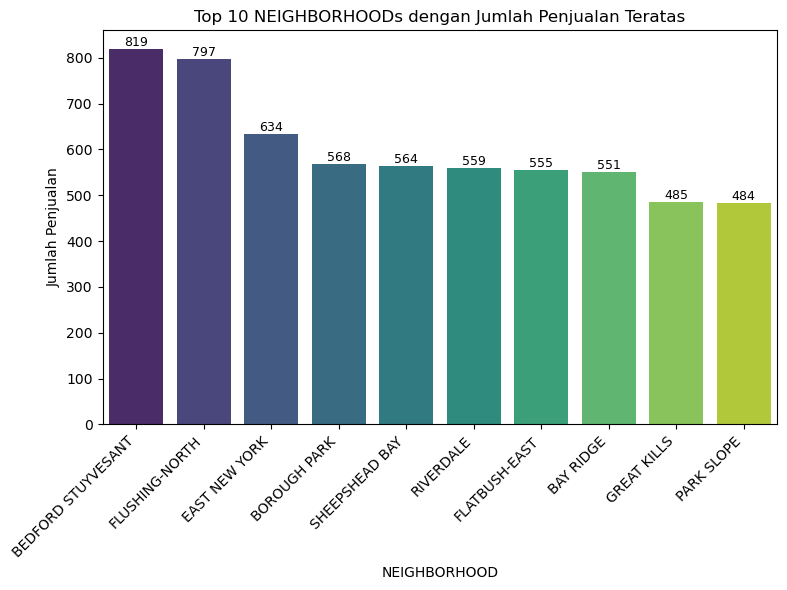

In [54]:
# Membuat bar chart dengan seaborn
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts, palette='viridis')

# Menampilkan nilai pada setiap bar
for index, value in enumerate(neighborhood_counts):
    bar_plot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=9)

plt.title('Top 10 NEIGHBORHOODs dengan Jumlah Penjualan Teratas')
plt.xlabel('NEIGHBORHOOD')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45, ha='right')  # Rotasi label untuk keterbacaan yang lebih baik
plt.tight_layout()  # Untuk menghindari pemotongan label
plt.show()


In [58]:
# Menghitung jumlah penjualan untuk setiap NEIGHBORHOOD
neighborhood_counts = nyc_p['NEIGHBORHOOD'].value_counts().reset_index()
neighborhood_counts.columns = ['NEIGHBORHOOD', 'neighborhood_counts']

In [60]:
# Menggabungkan data jumlah penjualan dengan data awal
merged_data = pd.merge(nyc_p, neighborhood_counts, on='NEIGHBORHOOD')

In [61]:
# Mengambil data untuk NEIGHBORHOOD teratas dan menyimpannya dalam DataFrame baru
top_neighborhoods_data = merged_data[merged_data['NEIGHBORHOOD'].isin(['BEDFORD STUYVESANT', 'FLUSHING-NORTH', 'EAST NEW YORK', 'BOROUGH PARK', 'SHEEPSHEAD BAY', 'RIVERDALE', 'FLATBUSH-EAST', 'BAY RIDGE', 'GREAT KILLS', 'PARK SLOPE'])]

In [63]:
# Menghitung korelasi antara jumlah penjualan (NEIGHBORHOOD) dan harga jual (SALE PRICE)
correlation_price_sale = top_neighborhoods_data[['neighborhood_counts', 'SALE PRICE']].corr().iloc[0, 1]

# Menampilkan nilai korelasi
print(f"Korelasi antara jumlah penjualan dan harga jual: {correlation_price_sale}")

Korelasi antara jumlah penjualan dan harga jual: 0.05716947935296576


Dalam kasus ini, karena nilai korelasi sangat dekat dengan 0, kita dapat menyimpulkan bahwa tidak ada hubungan linear yang kuat antara jumlah penjualan suatu NEIGHBORHOOD dan harga jual properti di NEIGHBORHOOD tersebut. Faktor-faktor lain di luar jumlah penjualan mungkin lebih mempengaruhi harga properti di NEIGHBORHOOD tersebut. Diperlukan analisis lebih lanjut untuk memahami faktor-faktor tersebut.

In [71]:
# Mengambil subset data dengan kolom-kolom numerik
numerical_columns = ['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']
numeric_data = nyc_p[numerical_columns]

# Menghitung korelasi antar kolom
correlation_matrix = numeric_data.corr()
correlation_matrix

,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
RESIDENTIAL UNITS,1.000000,0.012384,0.430342,0.706812,-0.017640,0.138813
COMMERCIAL UNITS,0.012384,1.000000,0.051832,0.065457,-0.002077,0.047876
LAND SQUARE FEET,0.430342,0.051832,1.000000,0.615670,0.007289,0.038861
GROSS SQUARE FEET,0.706812,0.065457,0.615670,1.000000,0.009794,0.508005
YEAR BUILT,-0.017640,-0.002077,0.007289,0.009794,1.000000,-0.003747
SALE PRICE,0.138813,0.047876,0.038861,0.508005,-0.003747,1.000000


In [72]:
# Mencari korelasi tertinggi (positif atau negatif)
strongest_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Menampilkan hubungan yang paling kuat
print("Hubungan yang paling kuat:")
print(strongest_correlations.head(10))

Hubungan yang paling kuat:
RESIDENTIAL UNITS  RESIDENTIAL UNITS    1.000000
                   GROSS SQUARE FEET    0.706812
LAND SQUARE FEET   GROSS SQUARE FEET    0.615670
SALE PRICE         GROSS SQUARE FEET    0.508005
RESIDENTIAL UNITS  LAND SQUARE FEET     0.430342
SALE PRICE         RESIDENTIAL UNITS    0.138813
GROSS SQUARE FEET  COMMERCIAL UNITS     0.065457
COMMERCIAL UNITS   LAND SQUARE FEET     0.051832
                   SALE PRICE           0.047876
SALE PRICE         LAND SQUARE FEET     0.038861
dtype: float64


- RESIDENTIAL UNITS vs. RESIDENTIAL UNITS (1.000000): Ini adalah korelasi antara jumlah unit residensial dengan dirinya sendiri, yang selalu akan menjadi 1 karena setiap entri memiliki nilai unit residensial yang sama dengan dirinya.

- RESIDENTIAL UNITS vs. GROSS SQUARE FEET (0.706812): Korelasi positif yang kuat menunjukkan bahwa jumlah unit residensial cenderung meningkat seiring dengan luas total (termasuk luas bruto). Ini masuk akal karena lebih banyak unit residensial dapat berarti luas total yang lebih besar.

- LAND SQUARE FEET vs. GROSS SQUARE FEET (0.615670): Korelasi positif yang kuat antara luas tanah dan luas bruto menunjukkan bahwa properti dengan luas tanah yang lebih besar cenderung memiliki luas bangunan yang lebih besar.

- SALE PRICE vs. GROSS SQUARE FEET (0.508005): Korelasi positif yang kuat menunjukkan bahwa properti dengan luas bangunan yang lebih besar cenderung memiliki harga jual yang lebih tinggi.

- RESIDENTIAL UNITS vs. LAND SQUARE FEET (0.430342): Korelasi positif yang kuat menunjukkan bahwa jumlah unit residensial cenderung meningkat seiring dengan luas tanah.

- SALE PRICE vs. RESIDENTIAL UNITS (0.138813): Korelasi positif yang lemah menunjukkan bahwa ada hubungan yang sedikit antara jumlah unit residensial dan harga jual. Namun, hubungan ini tidak terlalu kuat.

- GROSS SQUARE FEET vs. COMMERCIAL UNITS (0.065457): Korelasi positif yang lemah menunjukkan bahwa ada hubungan yang sedikit antara luas bangunan dan jumlah unit komersial. Namun, hubungan ini tidak terlalu kuat.

- COMMERCIAL UNITS vs. LAND SQUARE FEET (0.051832): Korelasi positif yang lemah menunjukkan bahwa ada hubungan yang sedikit antara jumlah unit komersial dan luas tanah. Namun, hubungan ini tidak terlalu kuat.

- COMMERCIAL UNITS vs. SALE PRICE (0.047876): Korelasi positif yang lemah menunjukkan bahwa ada hubungan yang sedikit antara jumlah unit komersial dan harga jual. Namun, hubungan ini tidak terlalu kuat.

- SALE PRICE vs. LAND SQUARE FEET (0.038861): Korelasi positif yang lemah menunjukkan bahwa ada hubungan yang sedikit antara harga jual dan luas tanah. Namun, hubungan ini tidak terlalu kuat.

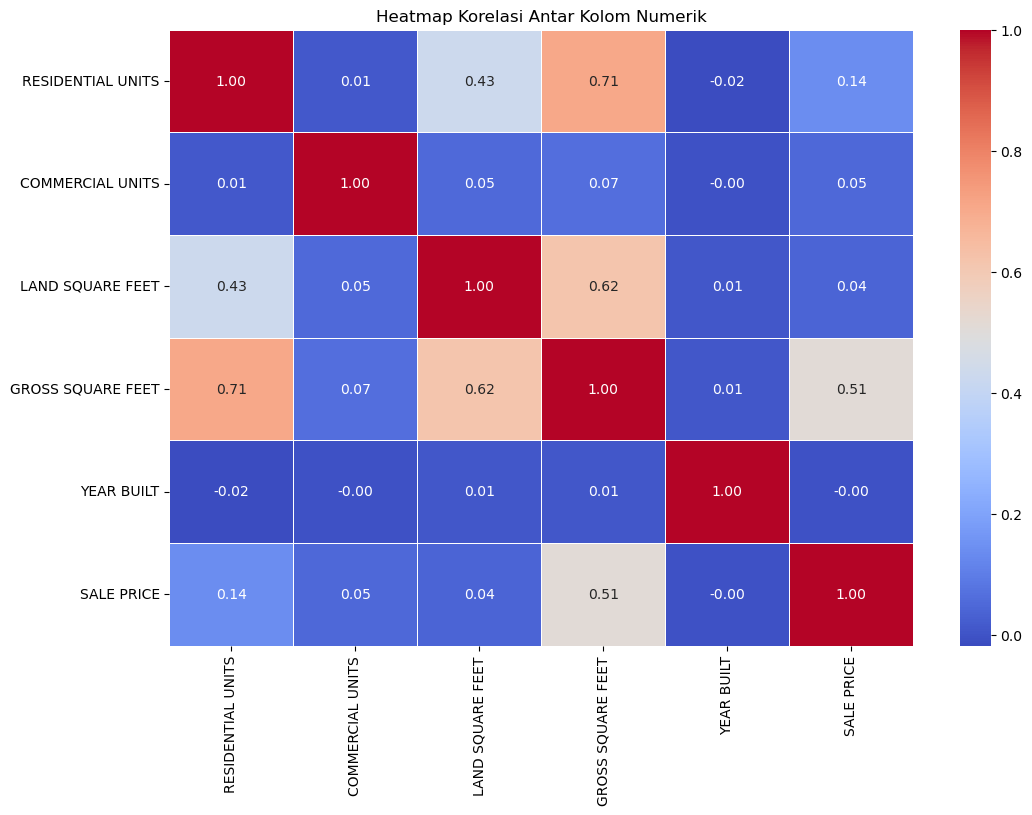

In [73]:
# Membuat heatmap korelasi menggunakan seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Kolom Numerik')
plt.show()

In [75]:
nyc_p[["RESIDENTIAL UNITS","SALE PRICE"]].corr()

,RESIDENTIAL UNITS,SALE PRICE
RESIDENTIAL UNITS,1.000000,0.138813
SALE PRICE,0.138813,1.000000


<AxesSubplot:xlabel='RESIDENTIAL UNITS', ylabel='SALE PRICE'>

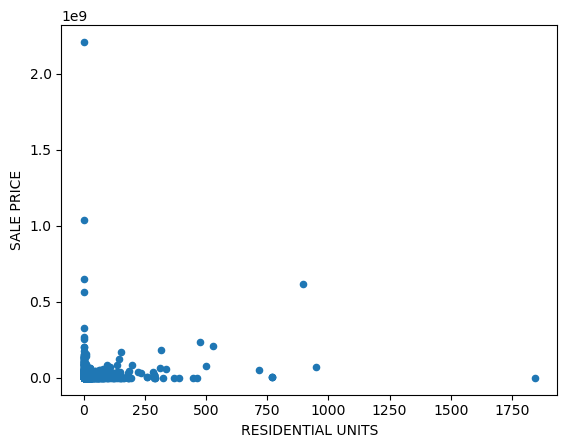

In [76]:
nyc_p.plot(kind="scatter",
           x="RESIDENTIAL UNITS",
           y="SALE PRICE")

In [77]:
nyc_p.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,36186.000000,36186.000000,36186.000000,36186.000000,36186.000000,36186.000000,36186.000000,3.618600e+04,3.618600e+04,36186.000000,36186.000000,3.618600e+04
mean,3.398939,5202.081855,174.324988,11009.719643,2.563920,0.267949,2.836511,3.519083e+03,3.750351e+03,1945.999503,1.378793,1.477848e+06
std,0.974157,3667.471308,372.451017,497.854114,18.065154,12.620037,22.163498,3.571815e+04,3.081960e+04,33.912162,0.719858,1.532223e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1800.000000,1.000000,1.000000e+00
25%,3.000000,2151.000000,20.000000,10467.000000,1.000000,0.000000,1.000000,1.600000e+03,1.056000e+03,1920.000000,1.000000,3.900000e+05
50%,3.000000,4755.500000,42.000000,11218.000000,1.000000,0.000000,1.000000,2.300000e+03,1.606000e+03,1935.000000,1.000000,6.000000e+05
75%,4.000000,7325.000000,79.000000,11361.000000,2.000000,0.000000,2.000000,3.375000e+03,2.400000e+03,1964.000000,2.000000,9.500000e+05
max,5.000000,16319.000000,7501.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


Penggunaan confidence interval untuk membuat pernyataan tentang rata-rata harga di RESIDENTIAL UNITS dengan tingkat kepercayaan 95%

In [82]:
# Filter data untuk mengambil hanya entri dengan nilai RESIDENTIAL UNITS > 0
data_residential_units = nyc_p['SALE PRICE'][nyc_p['RESIDENTIAL UNITS'] > 0]

# Menghitung rata-rata dan standard deviation dari data
mean_price = data_residential_units.mean()
std_price = data_residential_units.std()

# Menghitung confidence interval dengan tingkat kepercayaan 95%
confidence_interval = stats.norm.interval(0.95, loc=mean_price, scale=std_price / np.sqrt(len(data_residential_units)))

# Menampilkan confidence interval
print(f"Confidence Interval (95%) untuk rata-rata harga di RESIDENTIAL UNITS: {confidence_interval}")

Confidence Interval (95%) untuk rata-rata harga di RESIDENTIAL UNITS: (1074988.7245326103, 1190178.4430519184)


In [83]:
# Menghitung rata-rata harga di dalam kolom "RESIDENTIAL UNITS"
average_price_residential_units = nyc_p['SALE PRICE'][nyc_p['RESIDENTIAL UNITS'] > 0].mean()

# Menampilkan hasil
print(f"Rata-rata Harga di RESIDENTIAL UNITS: ${average_price_residential_units:.2f}")

Rata-rata Harga di RESIDENTIAL UNITS: $1132583.58


### Apakah rata-rata harga di RESIDENTIAL UNITS lebih besar dari $1,000,000. 

In [85]:
# Tentukan nilai mean hipotesis nol (H0)
mu_0 = 1000000

# Hitung nilai t dan p-value
t_statistic, p_value = stats.ttest_1samp(data_residential_units, mu_0)

# Tentukan tingkat signifikansi
alpha = 0.05

# Tentukan critical region
critical_region = stats.t.ppf(1 - alpha, df=len(data_residential_units) - 1)

# Print hasil uji
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")


T-Statistic: 4.5118445033882155
P-Value: 6.450038413967059e-06


In [86]:
# Bandingkan dengan critical region
if t_statistic > critical_region:
    print("Kita dapat menolak H0.")
else:
    print("Kita tidak dapat menolak H0.")

Kita dapat menolak H0.


Karena p-value sangat kecil (lebih kecil dari tingkat signifikansi α=0.05), kita dapat menolak hipotesis nol. Ini berarti ada bukti statistik yang cukup untuk menyatakan bahwa rata-rata harga di RESIDENTIAL UNITS secara signifikan lebih besar dari $1,000,000.

Dengan demikian, kita dapat menyimpulkan bahwa berdasarkan sampel data yang kita miliki, terdapat indikasi yang kuat bahwa rata-rata harga di RESIDENTIAL UNITS lebih besar dari $1,000,000.